<a href="https://colab.research.google.com/github/Boss-Darius/PMP-2023/blob/main/Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pymc as pm
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
import pytensor as pt

Exercitiul 1)

In [2]:
#a)
from google.colab import files

fisier=files.upload()

date=pd.read_csv('BostonHousing.csv')
date.dropna()

Saving BostonHousing.csv to BostonHousing.csv


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [13]:
#b)

crim=date["crim"].values
rm=date['rm'].values
indus=date['indus'].values
date_necesare=date[["crim",'rm','indus']]
with pm.Model() as model:
  # Am ales pentru alfa si beta-uri distributii half-normal deoarece sunt mai slab informative decat
  # distributiile normal, iar pentru epsilon am ales distributia Half Cauchy deoarece poate varia destul de mult.
  α = pm.HalfNormal('α', sigma=10)
  β1 = pm.HalfNormal('β1', sigma=10)
  β2 = pm.HalfNormal('β2', sigma=10)
  β3 = pm.HalfNormal('β3', sigma=10)
  indus= α + β1*crim +β2*rm + β3*indus
  ϵ = pm.HalfCauchy('ϵ', 10)

  medv_prezis=pm.Normal('medv_pred', mu=indus, sigma=ε, observed=date['medv'].values)
  idata_mlr = pm.sample(1000, return_inferencedata=True)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β1,-0.201,0.034,-0.263,-0.137,0.001,0.001,1300.0,1134.0,1.0
β2,7.398,0.407,6.635,8.230,0.013,0.009,941.0,1145.0,1.0
β3,-0.252,0.044,-0.337,-0.168,0.001,0.001,1145.0,1217.0,1.0


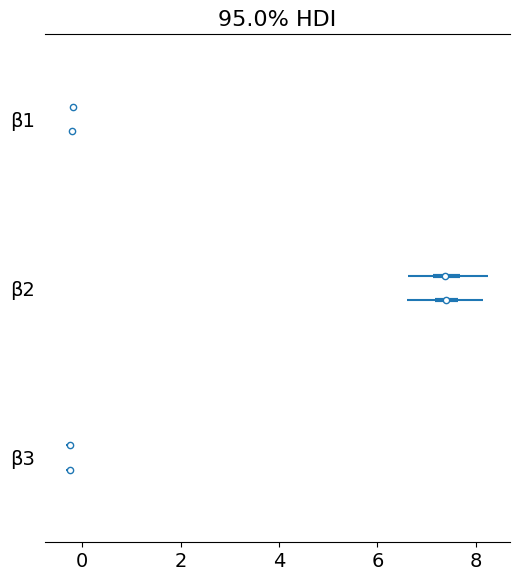

In [14]:
#c)
az.plot_forest(idata_mlr,hdi_prob=0.95,var_names=['β1','β2','β3'])
az.summary(idata_mlr,hdi_prob=0.95,var_names=['β1','β2','β3'])

**Din graficul generat mai sus se observa ca numarul mediu de camere (rm) influenteaza cel mai mult rezultatul, deoarece β2 are o valoare mult mai mare fata de β1 si β3. **

<Axes: title={'center': 'x'}>

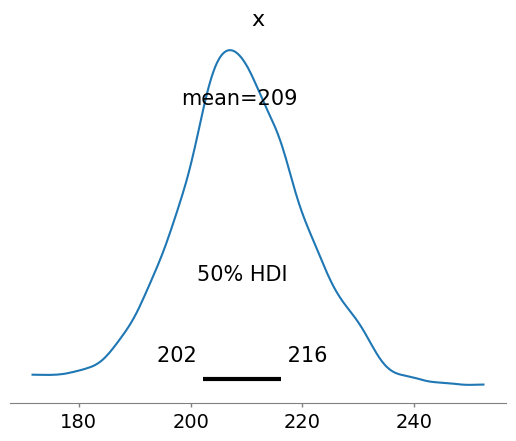

In [20]:
#d)
posterior_g = idata_mlr.posterior.stack(samples={"chain", "draw"}) #avem 5000 de extrageri in esantion (nr. draws x nr. chains)
mu = posterior_g['α']+33*posterior_g['β1']+33*posterior_g['β2'] +33*posterior_g['β3']
az.plot_posterior(mu.values,hdi_prob=0.5)

Exercitiul 2)

In [ ]:
#a)

from scipy.stats import geom

def posterior_grid( heads=5, tails=9):
  """
  A grid implementation for the coin-flipping problem
  """
  grid = np.linspace(0, 1, 5)
  prior = np.repeat(1/5, 5) # uniform prior
  likelihood = stats.geom.pmf(heads, heads+tails)
  posterior = likelihood * prior
  posterior /= posterior.sum()
  return grid, posterior